In [1]:
import pandas as pd
import datetime

In [2]:
def import_log(filename):
    dftemp = pd.read_csv(filename, header=None)
    dftemp.columns = ['ts', 'ms', 'pipeline', 'stage', 'cid', 'notes']
    return dftemp.copy()

In [3]:
def to_unix_timestamp(dfr):
    date_format = "%Y-%m-%d %H:%M:%S"
    unix_epoch = datetime.datetime.strptime(dfr['ts'], date_format).timestamp() + float(dfr['ms']) / 1000
    return unix_epoch

In [4]:
df1 = import_log('./p1_pipeline.log')
df2 = import_log('./p2_pipeline.log')
df3 = import_log('./p3_pipeline.log')
df4 = import_log('./p4_pipeline.log')

In [5]:
df_logs = pd.concat([df1, df2, df3, df4])
df4[:4]

,ts,ms,pipeline,stage,cid,notes
0,2019-01-06 01:55:24,982,p4,s0,92525ecf-7f86-4d01-bff2-bec820c85124,Received raw request
1,2019-01-06 01:55:24,993,p4,s1,92525ecf-7f86-4d01-bff2-bec820c85124,Published validated request
2,2019-01-06 01:55:24,993,p4,s0,26333cbb-5c2b-46e2-ad3a-8707028421aa,Received raw request
3,2019-01-06 01:55:25,4,p4,s1,26333cbb-5c2b-46e2-ad3a-8707028421aa,Published validated request


In [6]:
df_logs['tsunix'] = df_logs.apply(to_unix_timestamp, axis=1)

In [7]:
len(df_logs)

20000

In [8]:
pt = df_logs.pivot_table(columns=['stage'], index=['pipeline','cid'], values=['tsunix'])

In [9]:
df_summary = pd.DataFrame(pt.to_records())

In [10]:
df_summary.columns = ['pipeline', 'cid', 's0', 's1', 's2', 's3', 's4']

In [11]:
df_summary['i0'] = df_summary['s1'] - df_summary['s0']
df_summary['i1'] = df_summary['s2'] - df_summary['s1']
df_summary['i2'] = df_summary['s3'] - df_summary['s2']
df_summary['i3'] = df_summary['s4'] - df_summary['s3']
df_summary['i_total'] = df_summary['s4'] - df_summary['s0']

In [12]:
%matplotlib inline

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pipeline_violin_plot(df, pipeline):
    fig, axes = plt.subplots()

    axes.violinplot(dataset = [df[(df['pipeline'].str.strip() == pipeline)]["i0"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i1"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i2"].values,
                               df[(df['pipeline'].str.strip() == pipeline)]["i3"].values,],
                   showmeans=True)

    axes.set_title(f"Pipeline Analysis - {pipeline}")
    axes.yaxis.grid(True)
    axes.set_xlabel('Stage')
    axes.set_ylabel('Stage Latencies (seconds)')

    plt.show()
    
def pipeline_comparison_violin_plot(df):
    fig, axes = plt.subplots()

    axes.violinplot(dataset = [df[(df['pipeline'].str.strip() == "p1")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p2")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p3")]["i_total"].values,
                               df[(df['pipeline'].str.strip() == "p4")]["i_total"].values,], 
                    showmeans=True )

    axes.set_title('Pipeline Comparison Analysis')
    axes.yaxis.grid(True)
    axes.set_xlabel('Pipeline')
    axes.set_ylabel('End to End Latencies (seconds)')

    plt.show()

In [79]:
df_summary[:2]

,pipeline,cid,s0,s1,s2,s3,s4,i0,i1,i2,i3,i_total
0,p1,001912d0-a5ea-4573-82e8-afd5cc183e11,1.546645e+09,1.546645e+09,1.546645e+09,1.546645e+09,1.546645e+09,0.010,12.993,38.153,10.449,61.605
1,p1,00323a51-c2df-49a3-ab2a-9d99422be0cb,1.546645e+09,1.546645e+09,1.546645e+09,1.546645e+09,1.546645e+09,0.011,32.783,18.194,10.411,61.399


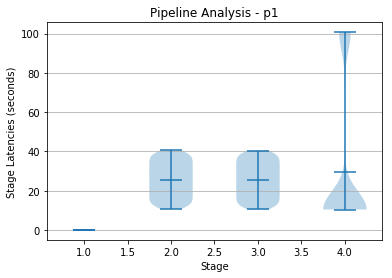

In [80]:
pipeline_violin_plot(df_summary, 'p1')

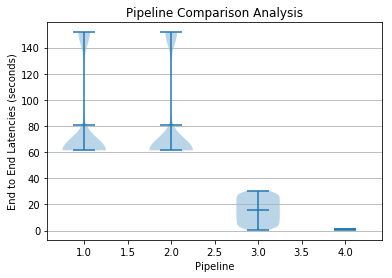

In [81]:
pipeline_comparison_violin_plot(df_summary)